## Backpropagation.

Efficiently evaluate the gradient of a loss function with respect to the weights of a neural network.  Enables iterative tuning of weights of NN to minimize loss function and improve accuracy of the NN.

In [ ]:
%pip install numpy 
%pip install matplotlib
%pip install sympy
%pip install graphviz
# note also need to brew install graphviz or eqivalent for your OS

Define the function

$$
f(x) = 3x^2 - 4x + 5
$$

add call it with x = 3

The plot from -5 to 5 in steps of 0.25

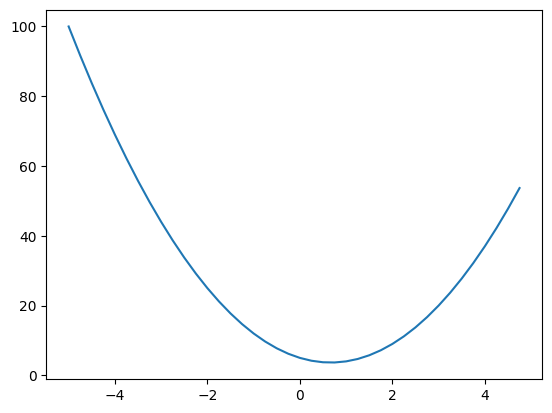

In [63]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

## Approximating the derivative

Instead of a symbolic approach we can use a numerical approximation

Newton's difference quotient (the definition of a derivative):

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

For numerical approximation, we use a small value of $h$:

$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$$

For a function x, if you slightly increase the input by h, how does the function respond, with what sensitivity, what is the slope of the response.

To evaluate the derivitve, take a small h.

In [64]:
h = 0.001
x = 3.0
print((f(x + h) - f(x)) / h) # rise over run

# make h very small in order to converge on the actual derivative

# Look at above graph where x is 3.0 and look at the shape as x increases
# you can see it is going up very steeply
# so we expect the derivative to be a large positive number

x = 3.0
h = 0.00000001 # increase x very slightly with the delta h...

print((f(x + h) - f(x)) / h) # rise over run

# when h is too small, we run into floating point precision issues
x = 3.0
h = 0.0000000000000000000001
print((f(x + h) - f(x)) / h) # rise over run

# at 3.0, the derivative is 14.0 which means the slope of the tangent line is 14.0


14.00300000000243
14.00000009255109
0.0


Now let's validate the numerical approximation with a symbolic approach using the 'sympy' library.

In [65]:
import sympy
from sympy import symbols, diff, lambdify

x, y = symbols( 'x actual_y')
fx = 3*x**2 - 4*x + 5

print('f(x) =',  fx)

dfx = sympy.diff(fx, x)
print(dfx)

evalx = lambdify([x], fx)
print(evalx(3))

evaldx = lambdify([x], dfx)
print(evaldx(3))


f(x) = 3*x**2 - 4*x + 5
6*x - 4
20
14


What about the slope at -3.  Look at the slope of the graph above at that point.

In [66]:
# when h is too small, we run into floating point precision issues
x = -3.0
h = 0.000000001
print((f(x + h) - f(x)) / h) # rise over run

-22.000001820288162


Looking at the graph we can see that the slope is at it's most minimal value at an x of just under somewhere between 0 and 1 so let's try an x value around there

In [67]:
x = 0.655555
h = 0.000000001
print((f(x + h) - f(x)) / h) # rise over run

-0.0666702248963702


The actual exact value of x with slope 0 is 2/3

In [68]:
x = 2/3
h = 0.000000001
print((f(x + h) - f(x)) / h) # rise over run

# nudge up a little bit and derivitive changes hardly at all
h = 0.0001
print((f(x + h) - f(x)) / h) # rise over run

# same for nudging down
h = -0.0001
print((f(x + h) - f(x)) / h) # rise over run

0.0
0.0002999999981767587
-0.0002999999981767587


## More complex example.

In [69]:
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [70]:
h = 0.0001

# a inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a = a + h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h) # since we nudged the a input, 
# the slope represents dd/da the derivative of d with respect to a

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


Let's verify this using symbolic approach

In [71]:
import sympy
from sympy import symbols, diff, lambdify

a, b, c = symbols( 'a b c')
d = a * b + c

print('d =',  d)

ddwrtda = sympy.diff(d, a)
print('dd/da =',  ddwrtda)

evald = lambdify([a, b, c], d)
print('Evaluate with 2, -3, 10:',evald(2, -3, 10))

evaddwrtda = lambdify([a, b, c], ddwrtda)
print('Calc dd/da with 2, -3, 10:', evaddwrtda(2, -3, 10))

d = a*b + c
dd/da = b
Evaluate with 2, -3, 10: 4
Calc dd/da with 2, -3, 10: -3


## Let's build a way of expressing expression trees

In [72]:
class Value:
    def __init__(self, data):
        self.data = data
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
x = Value(2.0)
y = Value(3.0)
print(f'x:{x}, y:{y}')

x:Value(data=2.0), y:Value(data=3.0)


But, if we try and add x + y we would get an error, hence we need to add an overload for addition

In [73]:
class Value:
    def __init__(self, data):
        self.data = data
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data)
    
x = Value(2.0)
y = Value(3.0)
z = x + y
print(f'z:{z}')

z:Value(data=5.0)


Now multiply so that we can represent a*b+c

In [74]:
class Value:
    def __init__(self, data):
        self.data = data
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data)
    
    def __mul__(self, other):
        return Value(self.data * other.data)

a = Value(2.0)
b = Value(-3.0) 
c  = Value(10.0)
d = a * b + c
print(f'd:{d}')

d:Value(data=4.0)


In order to express the relationships between objects as an expression graph, we need a way of tracking the relationships between objects along with the operations that produced them.

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

   # see hyperbolic functions, exponential definitions: https://en.wikipedia.org/wiki/Hyperbolic_functions 
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
print(f'c children: {d._prev}')
print(f'c op: {d._op}')

c children: {Value(data=-6.0), Value(data=10.0)}
c op: +


In [148]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) 
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot


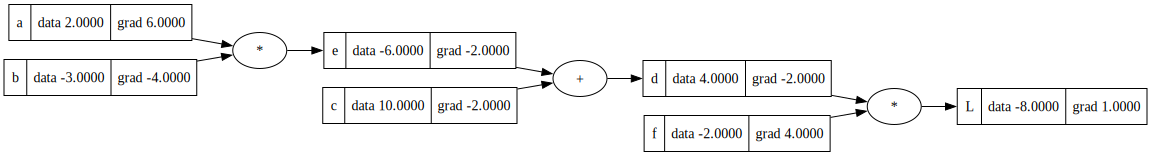

In [149]:
L.grad = 1.0
d.grad = -2.0
f.grad = 4.0
e.grad = -2.0
c.grad = -2.0
a.grad = 6.0
b.grad = -4.0
draw_dot(L)

In [150]:
def lol():
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L
    
    a = Value(2.0, label='a')
    # a = a + Value(h) # dL/da again due to chain 
    b = Value(-3.0, label='b')
    # b = b + Value(h) # dL/db
    c = Value(10.0, label='c')
    # c = c + Value(h) # dL/dc # due to chain rule since L depends on d which depends on c
    # see n Leibniz's notation on wikipedia and intuitive explanation with bycicle and car
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    # d = d + Value(h) # dL/dd
    #f = f + Value(h) # dL/df
    L = d * f; L.label = 'L'
    # L2 = L + Value(h) # dL/dL
    L2 = L

    print((L2.data - L1.data) / h) # rise over run

lol()

0.0


Now look at a neuron.

For a neuron with tanh activation function:

$$
y = \tanh(w_1x_1 + w_2x_2 + b)
$$

Where:
- $x_1, x_2$ are the inputs
- $w_1, w_2$ are the weights  
- $b$ is the bias
- $y$ is the output

The computation can be broken down into steps:
1. Linear combination: $z = w_1x_1 + w_2x_2 + b$
2. Activation: $y = \tanh(z)$

Note that tanh is a hyperbolic function

The activation function squashes and clamps values.  Here is what tanh looks like:

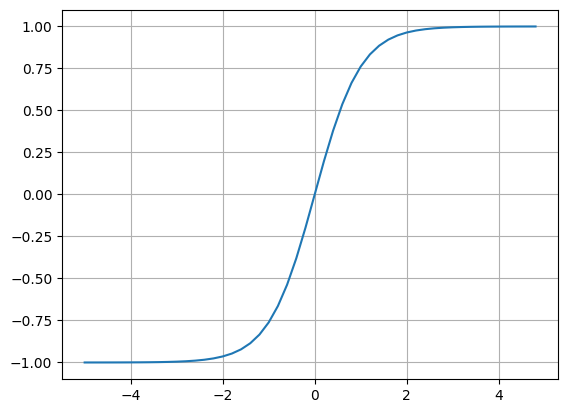

In [151]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

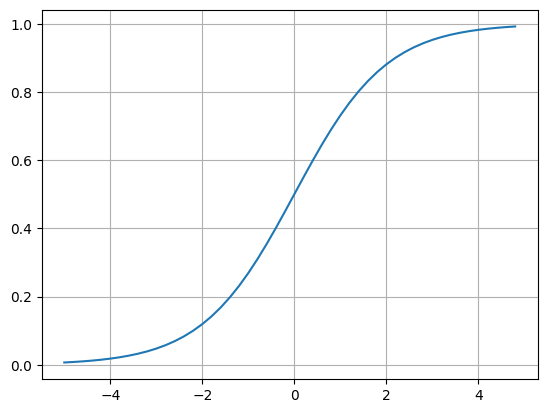

In [152]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(np.arange(-5, 5, 0.2), sigmoid(np.arange(-5, 5, 0.2))); plt.grid()

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

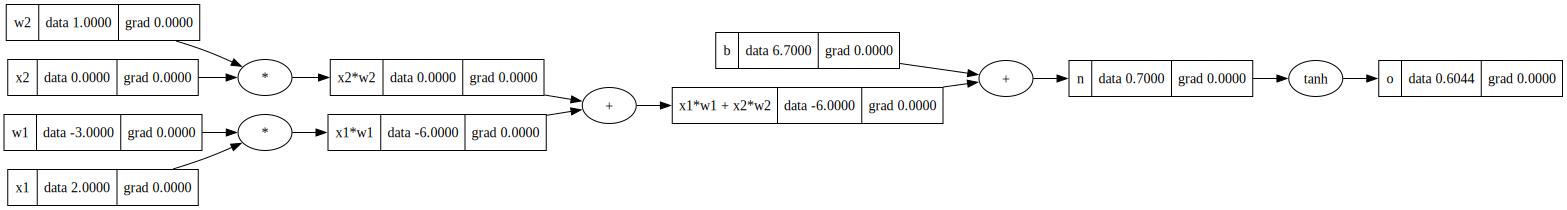

In [156]:
draw_dot (o)